## Ball Picking Challenge

### Part 2: Pick and Place

The aim is to program the robot for the second part of the challenge: pick up the balls and transport them to the corner. To do so, you need to reuse the abilities learnt in week 4; please feel free to reuse the code of those notebooks and exercises.

In [1]:
import packages.initialization
import packages.pioneer3dx as p3dx
p3dx.init()

Found ROS controller /pioneer3dx_31291_ip_172_31_40_189


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import cv2
import numpy

In [4]:
def blue_balls():
    hsv = cv2.cvtColor(p3dx.image, cv2.COLOR_RGB2HSV)
    lower_blue = numpy.array([110,  50,  50])
    upper_blue = numpy.array([130, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = 5
    detector = cv2.SimpleBlobDetector(params)
    reversemask = 255-mask
    keypoints = detector.detect(reversemask)
    l = []
    for i,kp in enumerate(keypoints):
        l.append((kp.size,) + kp.pt)
    l.sort(key=lambda tup: tup[0], reverse=True)
    return l

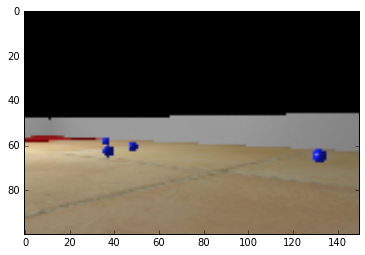

In [5]:
plt.imshow(p3dx.image);

In [6]:
b = blue_balls()
for ball in b:
    print("X: %3.0f Y: %2.0f Diameter: %4.2f " % (ball[1], ball[2], ball[0]))

X: 131 Y: 65 Diameter: 3.59 
X:  48 Y: 60 Diameter: 2.61 


---
#### Try-a-Bot: an open source guide for robot programming
Developed by:
[![Robotic Intelligence Lab @ UJI](img/logo/robinlab.png "Robotic Intelligence Lab @ UJI")](http://robinlab.uji.es)

Sponsored by:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="http://www.ieee-ras.org"><img src="img/logo/ras.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.cyberbotics.com"><img src="img/logo/cyberbotics.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.theconstructsim.com"><img src="img/logo/theconstruct.png"></a>
</td>
</tr>
</table>

Follow us:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="https://www.facebook.com/RobotProgrammingNetwork"><img src="img/logo/facebook.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="https://www.youtube.com/user/robotprogrammingnet"><img src="img/logo/youtube.png"></a>
</td>
</tr>
</table>